# Régression polynomiale simple

In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [2]:
x, y = make_regression (n_samples=200, n_features=1, noise=10)
y = y + abs(y/2)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 1)
(200, 1)
[[-0.04673844]
 [ 0.54350702]
 [-0.54034732]
 [ 0.70272819]
 [-0.14010638]
 [-0.35840324]
 [-1.09686189]
 [ 0.16892356]
 [-0.92939791]
 [-1.42945601]
 [ 0.12549508]
 [-0.56581419]
 [ 1.58216607]
 [-1.18220989]
 [-0.14659392]
 [ 0.11180342]
 [ 0.32278006]
 [-0.60166801]
 [ 1.58643772]
 [-1.62380109]
 [ 1.2156086 ]
 [-0.19462633]
 [ 0.31968308]
 [-0.20718644]
 [ 1.51103034]
 [-0.3206558 ]
 [-1.11418799]
 [-0.48479494]
 [-0.5381851 ]
 [ 1.16832678]
 [-0.23777261]
 [ 0.08340085]
 [-1.61960737]
 [ 0.85050417]
 [-0.12114231]
 [-0.57308614]
 [ 0.02033384]
 [ 0.71090388]
 [ 1.02456445]
 [ 0.2892802 ]
 [-2.31557572]
 [ 0.2124048 ]
 [-0.2883709 ]
 [ 0.06144981]
 [-2.07616328]
 [ 1.52860819]
 [ 0.25884855]
 [ 0.44796931]
 [-0.10850053]
 [-0.91521272]
 [ 1.048084  ]
 [-1.28789641]
 [ 0.48889158]
 [-0.03176586]
 [ 0.01105709]
 [-0.2702509 ]
 [ 2.51170077]
 [-0.949185  ]
 [ 1.69935394]
 [ 0.28788089]
 [ 0.7423949 ]
 [-0.82956382]
 [-1.35192915]
 [-0.71138301]
 [-0.54269078]
 [-0.47

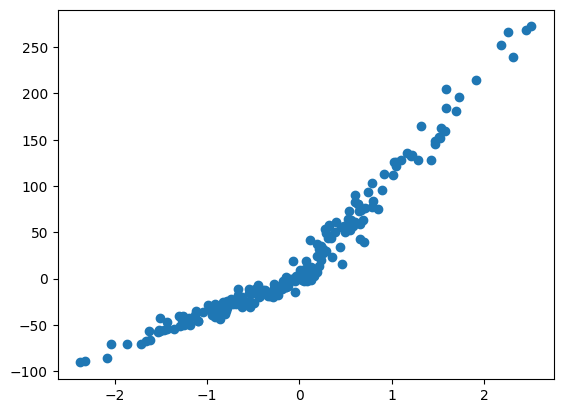

In [3]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Modèle

In [4]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [5]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [6]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [7]:
#on va utiliser une régression polynomiale, car cette dernière imite de manière plus fidèle une courbe
#contrairement à un modèle de régression linéaire qui est plus efficace pour les fonctions affines.
theta_pol = np.random.randn(3,1)
print(theta_pol.shape)
print(theta_pol)

(3, 1)
[[1.44923219]
 [0.1198487 ]
 [1.63444599]]


In [8]:
X_pol = np.hstack((x**2, x, np.ones(x.shape)))
print(X_pol.shape)
print(X_pol)

(200, 3)
[[ 2.18448175e-03 -4.67384398e-02  1.00000000e+00]
 [ 2.95399881e-01  5.43507020e-01  1.00000000e+00]
 [ 2.91975229e-01 -5.40347322e-01  1.00000000e+00]
 [ 4.93826914e-01  7.02728194e-01  1.00000000e+00]
 [ 1.96297982e-02 -1.40106382e-01  1.00000000e+00]
 [ 1.28452884e-01 -3.58403242e-01  1.00000000e+00]
 [ 1.20310599e+00 -1.09686189e+00  1.00000000e+00]
 [ 2.85351683e-02  1.68923557e-01  1.00000000e+00]
 [ 8.63780480e-01 -9.29397913e-01  1.00000000e+00]
 [ 2.04334447e+00 -1.42945601e+00  1.00000000e+00]
 [ 1.57490156e-02  1.25495082e-01  1.00000000e+00]
 [ 3.20145695e-01 -5.65814187e-01  1.00000000e+00]
 [ 2.50324947e+00  1.58216607e+00  1.00000000e+00]
 [ 1.39762022e+00 -1.18220989e+00  1.00000000e+00]
 [ 2.14897771e-02 -1.46593919e-01  1.00000000e+00]
 [ 1.25000058e-02  1.11803425e-01  1.00000000e+00]
 [ 1.04186970e-01  3.22780065e-01  1.00000000e+00]
 [ 3.62004400e-01 -6.01668015e-01  1.00000000e+00]
 [ 2.51678465e+00  1.58643772e+00  1.00000000e+00]
 [ 2.63672998e+00 -1.6

In [9]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X_pol, y, theta_pol, 0.01, 1000)
newThetaPol = resultDescenteGradientPol[0]
varCoutPol = resultDescenteGradientPol[1]

print(newThetaPol.shape)
print(newThetaPol)

(3, 1)
[[15.78570456]
 [72.34857694]
 [12.89061286]]


[[ 9.54363684e+00]
 [ 5.68756676e+01]
 [-2.15937123e+01]
 [ 7.15274034e+01]
 [ 3.06398571e+00]
 [-1.10116324e+01]
 [-4.74739078e+01]
 [ 2.55624396e+01]
 [-4.07146201e+01]
 [-5.82728628e+01]
 [ 2.22186128e+01]
 [-2.29915130e+01]
 [ 1.66873633e+02]
 [-5.05781704e+01]
 [ 2.62398270e+00]
 [ 2.11767529e+01]
 [ 3.78879559e+01]
 [-2.49247173e+01]
 [ 1.67396344e+02]
 [-6.29664448e+01]
 [ 1.24164768e+02]
 [-5.92371941e-01]
 [ 3.76324849e+01]
 [-1.42141080e+00]
 [ 1.58253628e+02]
 [-8.68528968e+00]
 [-4.81226943e+01]
 [-1.84735581e+01]
 [-2.14740910e+01]
 [ 1.18964681e+02]
 [-3.41943975e+00]
 [ 1.90343463e+01]
 [-6.28777514e+01]
 [ 8.58420848e+01]
 [ 4.35780134e+00]
 [-2.33868908e+01]
 [ 1.43682644e+01]
 [ 7.23013447e+01]
 [ 1.03587157e+02]
 [ 3.51406194e+01]
 [-6.99967694e+01]
 [ 2.89699829e+01]
 [-6.65990710e+00]
 [ 1.73960274e+01]
 [-6.92732931e+01]
 [ 1.60368796e+02]
 [ 3.26756201e+01]
 [ 4.84683753e+01]
 [ 5.22658906e+00]
 [-4.01013927e+01]
 [ 1.06058281e+02]
 [-5.41034720e+01]
 [ 5.2034243

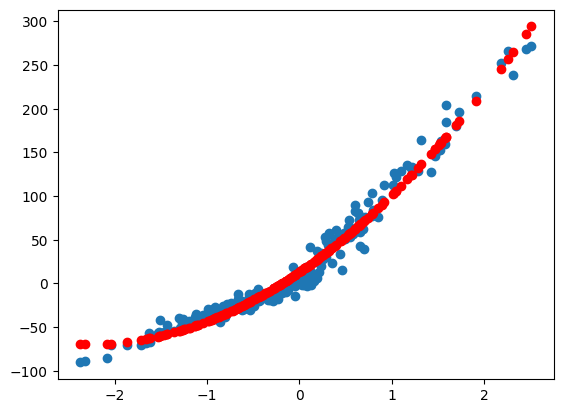

In [10]:
y_predictions_pol = model(X_pol, newThetaPol)
print(y_predictions_pol)
plt.scatter(x, y)
plt.scatter(x, y_predictions_pol, c='red')

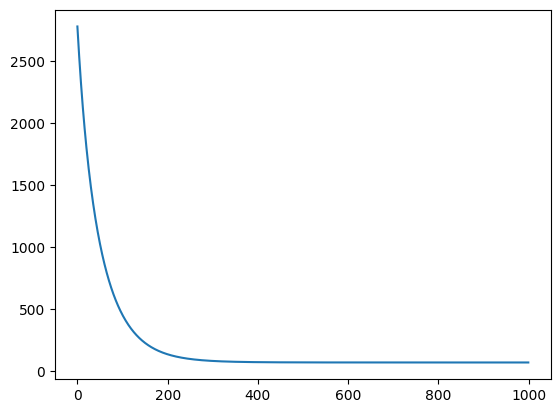

In [11]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCoutPol)

In [12]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions_pol)
print(coeffPredictions_pol)

0.9737242865239055
